In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Documents/repos/juDataNSOM`


In [2]:
using DataAnNSOM, LinearAlgebra,Interpolations,LaTeXStrings,Plots; pyplot()

┌ Info: Precompiling DataAnNSOM [2b288ba5-5bae-46b0-a503-45a1fdc6ef2f]
└ @ Base loading.jl:1664


Plots.PyPlotBackend()

In [43]:
mo,dy = 10,14; fi=2
nEl = 5
data,datAmp,datFase = DataAnNSOM.read_FileData(mo,dy,fi);
size(data)

(3, 2, 45)

# NSOM Rejilla

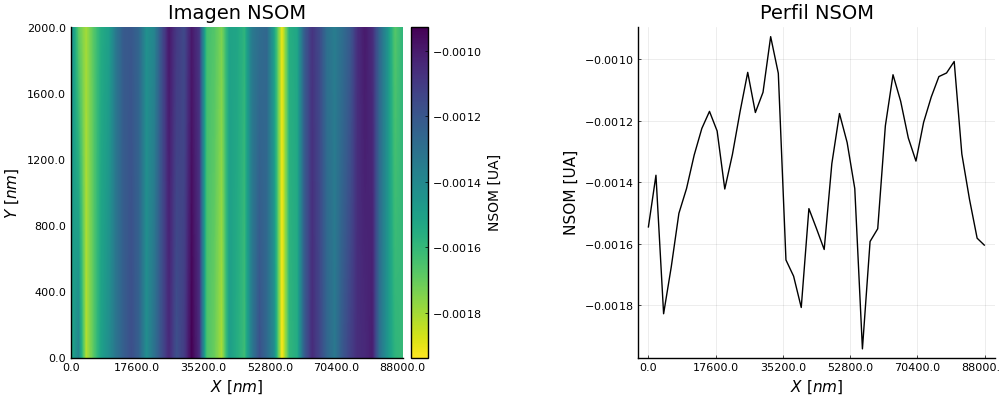

In [44]:

datIm = data[2,:,:]
labelT = "NSOM [UA]"

p1 = DataAnNSOM.plotImag(mo,dy,datIm, labelT,5,fi)
p1 = title!("Imagen NSOM")
#p1 = hline!([1,1], c = :red, label=:none)
p2 = DataAnNSOM.plotProfile(mo,dy,datIm, labelT,5,1,fi);
p2 = title!("Perfil NSOM")
#plot(p1,p2, size=(1200,400) )
plot(p1,p2, size=(1000,400))

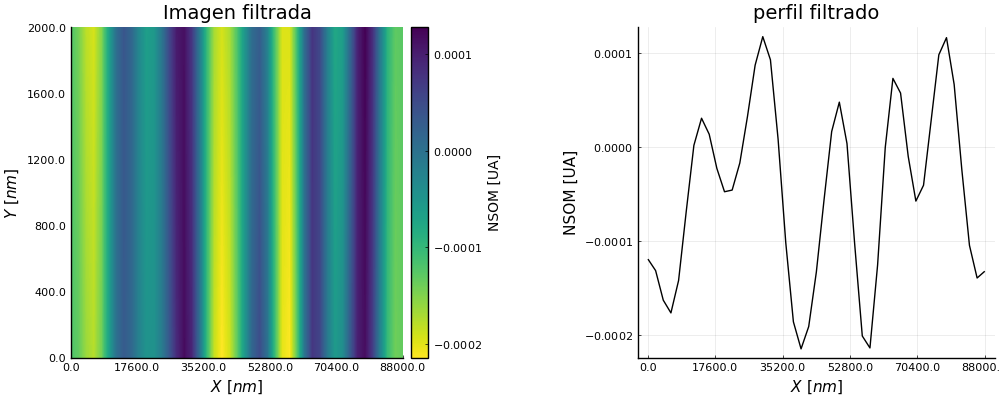

In [45]:
n0,nct = 6,1.6
opt,order = "GH",4
datFiltr1 = DataAnNSOM.getFiltImag1(datIm,n0,nct,opt,order)

p1f = DataAnNSOM.plotImag(mo,dy,datFiltr1, labelT,5,fi)
p1f = title!("Imagen filtrada")
p2f = DataAnNSOM.plotProfile(mo,dy,datFiltr1, labelT,5,1,fi)
p2f = title!("perfil filtrado")
plot(p1f,p2f, size=(1000,400))

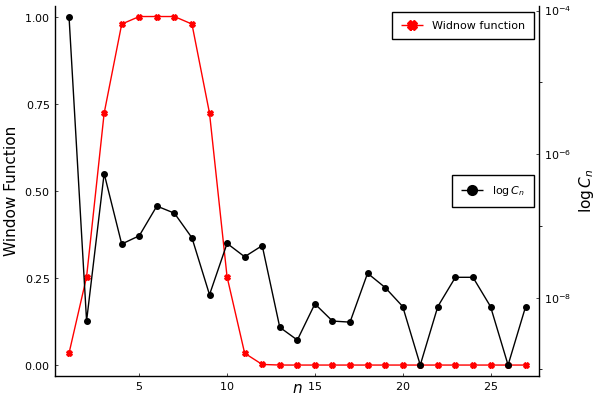

In [46]:
PSD,dataF = DataAnNSOM.GetFourierCoefs1(datIm[1,:])
_,indices = DataAnNSOM.GetFilteredData1(dataF,n0,nct,opt,order)
DataAnNSOM.PlotFilter(PSD,indices)

# =============================================================================

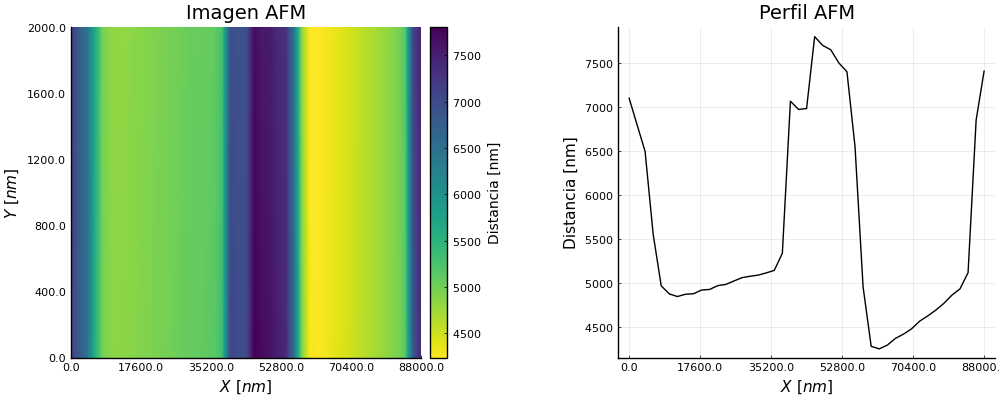

In [47]:

datIm = data[1,:,:]
labelT = "Distancia [nm]"

p1 = DataAnNSOM.plotImag(mo,dy,datIm, labelT,5,fi)
p1 = title!("Imagen AFM")
#p1 = hline!([1,1], c = :red, label=:none)
p2 = DataAnNSOM.plotProfile(mo,dy,datIm, labelT,5,1,fi);
p2 = title!("Perfil AFM")
#plot(p1,p2, size=(1200,400) )
plot(p1,p2, size=(1000,400))

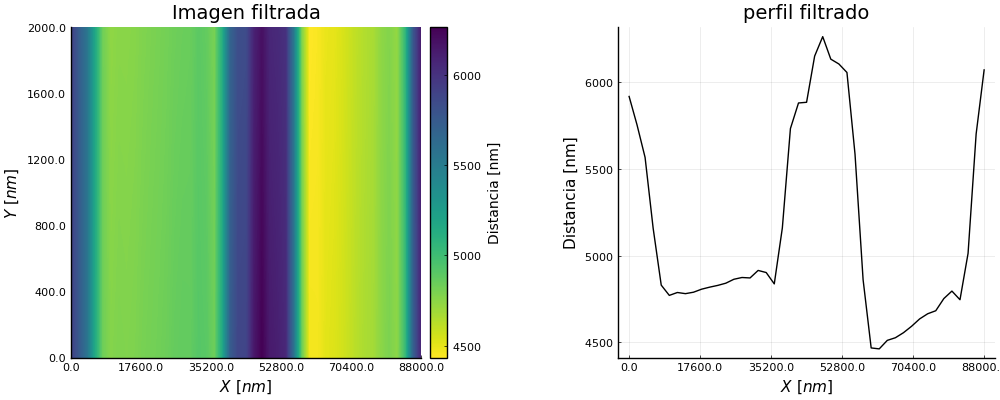

In [48]:
n0,nct = 7,4
opt,order = "GH",4
datFiltr2 = DataAnNSOM.getFiltImag1(datIm,n0,nct,opt,order)

p1f = DataAnNSOM.plotImag(mo,dy,datFiltr2, labelT,5,fi)
p1f = title!("Imagen filtrada")
p2f = DataAnNSOM.plotProfile(mo,dy,datFiltr2, labelT,5,1,fi)
p2f = title!("perfil filtrado")
plot(p1f,p2f, size=(1000,400))

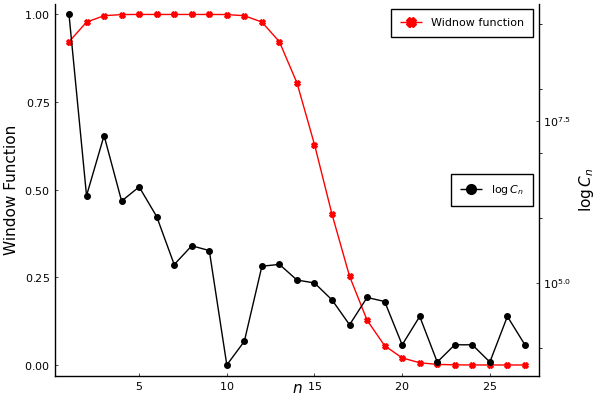

In [49]:
PSD,dataF = DataAnNSOM.GetFourierCoefs1(datIm[1,:])
_,indices = DataAnNSOM.GetFilteredData1(dataF,n0,nct,opt,order)
DataAnNSOM.PlotFilter(PSD,indices)

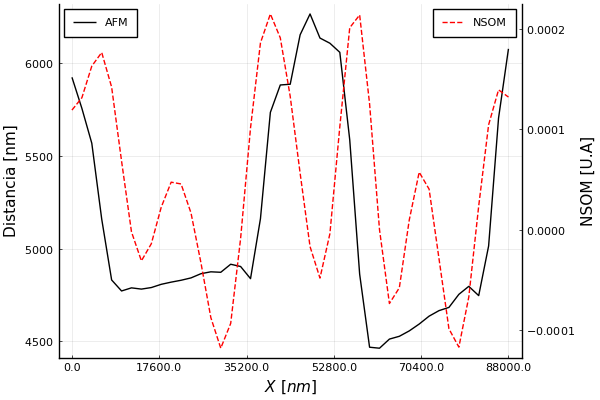

In [51]:
i = fi

dat1,dat2 = -datFiltr1[1,:],datFiltr2[1,:]; 
label1,label2="Distancia [nm]","NSOM [U.A]"
DataAnNSOM.PlotCompProfiles(mo,dy,i,dat1,dat2,label1,label2,5)

# ================================================================================

In [88]:
mo,dy = 10,15; fi=2
nEl = 5
data,datAmp,datFase = DataAnNSOM.read_FileData(mo,dy,fi);
size(data)

(3, 2, 45)

# NSOM Rejilla

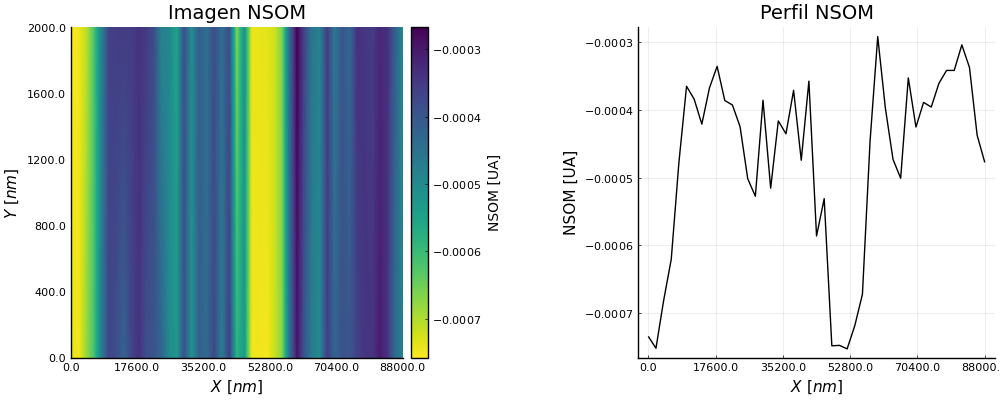

In [89]:

datIm = data[2,:,:]
labelT = "NSOM [UA]"

p1 = DataAnNSOM.plotImag(mo,dy,datIm, labelT,5,fi)
p1 = title!("Imagen NSOM")
#p1 = hline!([1,1], c = :red, label=:none)
p2 = DataAnNSOM.plotProfile(mo,dy,datIm, labelT,5,1,fi);
p2 = title!("Perfil NSOM")
#plot(p1,p2, size=(1200,400) )
plot(p1,p2, size=(1000,400))

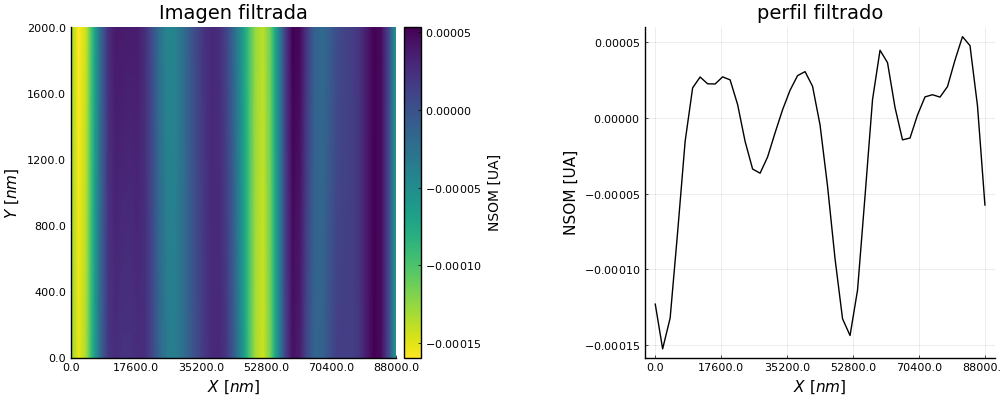

In [90]:
n0,nct = 6,1.6
opt,order = "GH",4
datFiltr1 = DataAnNSOM.getFiltImag1(datIm,n0,nct,opt,order)

p1f = DataAnNSOM.plotImag(mo,dy,datFiltr1, labelT,5,fi)
p1f = title!("Imagen filtrada")
p2f = DataAnNSOM.plotProfile(mo,dy,datFiltr1, labelT,5,1,fi)
p2f = title!("perfil filtrado")
plot(p1f,p2f, size=(1000,400))

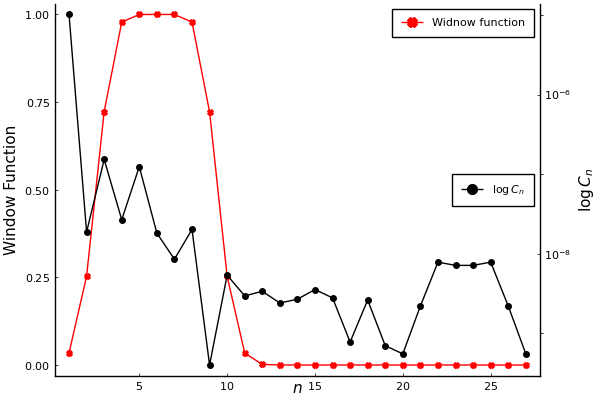

In [91]:
PSD,dataF = DataAnNSOM.GetFourierCoefs1(datIm[1,:])
_,indices = DataAnNSOM.GetFilteredData1(dataF,n0,nct,opt,order)
DataAnNSOM.PlotFilter(PSD,indices)

# =============================================================================

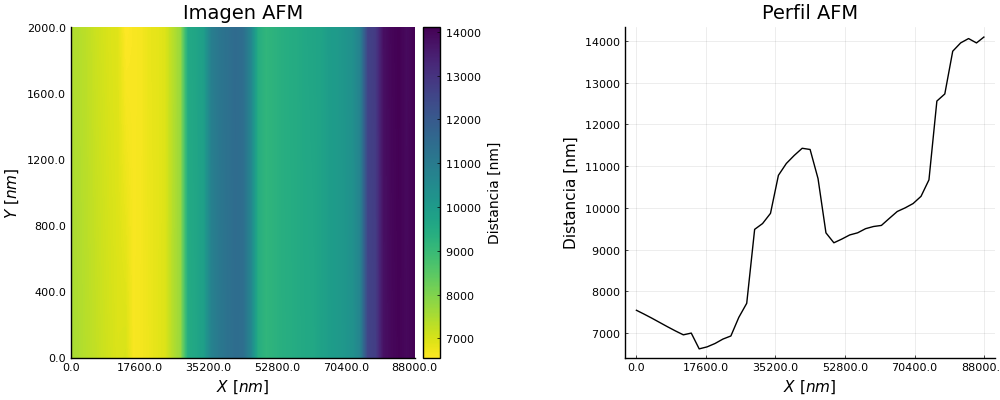

In [92]:

datIm = data[1,:,:]
labelT = "Distancia [nm]"

p1 = DataAnNSOM.plotImag(mo,dy,datIm, labelT,5,fi)
p1 = title!("Imagen AFM")
#p1 = hline!([1,1], c = :red, label=:none)
p2 = DataAnNSOM.plotProfile(mo,dy,datIm, labelT,5,1,fi);
p2 = title!("Perfil AFM")
#plot(p1,p2, size=(1200,400) )
plot(p1,p2, size=(1000,400))

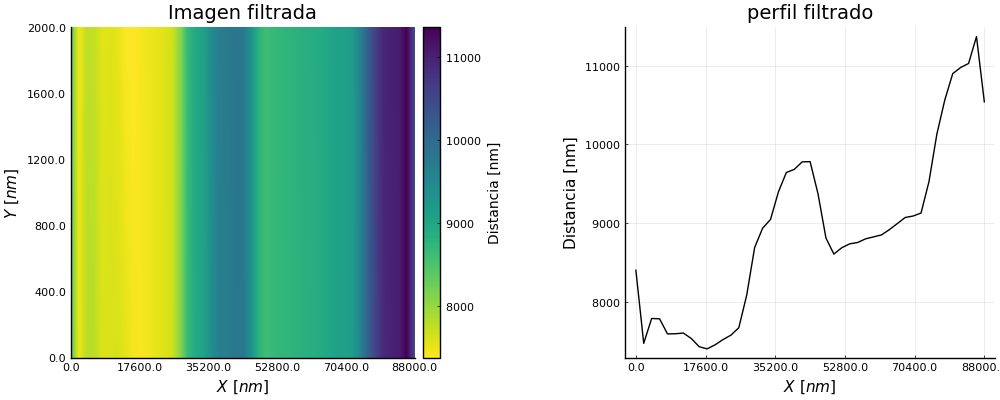

In [93]:
n0,nct = 7,4
opt,order = "GH",4
datFiltr2 = DataAnNSOM.getFiltImag1(datIm,n0,nct,opt,order)

p1f = DataAnNSOM.plotImag(mo,dy,datFiltr2, labelT,5,fi)
p1f = title!("Imagen filtrada")
p2f = DataAnNSOM.plotProfile(mo,dy,datFiltr2, labelT,5,1,fi)
p2f = title!("perfil filtrado")
plot(p1f,p2f, size=(1000,400))

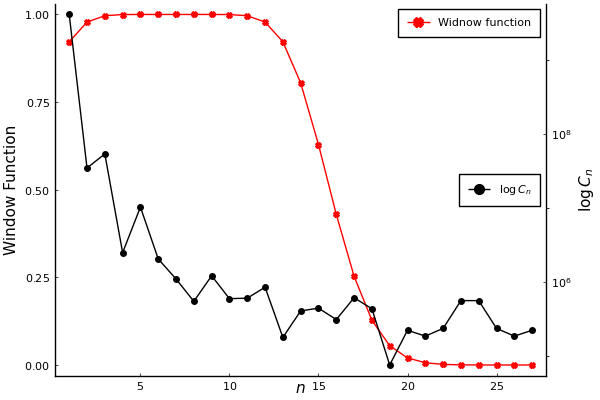

In [94]:
PSD,dataF = DataAnNSOM.GetFourierCoefs1(datIm[1,:])
_,indices = DataAnNSOM.GetFilteredData1(dataF,n0,nct,opt,order)
DataAnNSOM.PlotFilter(PSD,indices)

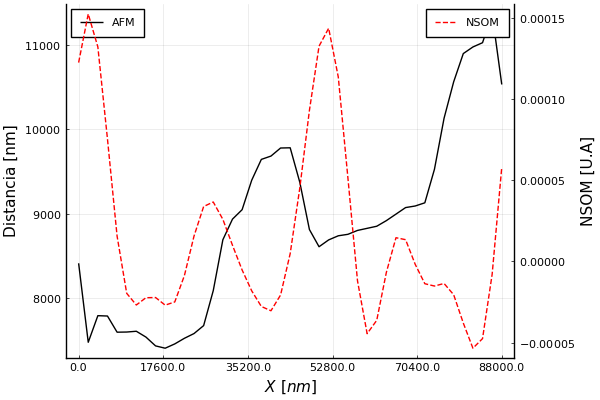

In [95]:
i = fi

dat1,dat2 = -datFiltr1[1,:],datFiltr2[1,:]; 
label1,label2="Distancia [nm]","NSOM [U.A]"
DataAnNSOM.PlotCompProfiles(mo,dy,i,dat1,dat2,label1,label2,5)